# NAMYENYA DOREEN

# REG NO. 2022/DCSE/029/SS


In [1]:
# Importing all librariaries that are needed
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
%matplotlib inline
import empiricaldist
from empiricaldist import Cdf
import scipy
from scipy.stats import norm


#  QUESTION ONE

In general it is a good idea to visualize the relationship between variables before you compute a
correlation. Using the exam1 dataset. Generate a visualization of the relationship between any two
continouse variables of your choice. How would you describe the relationship, if any?
(a) Compute the descriptive statistics.
(b) Explain and visualise the regression analysis results for variables: Confirmed cases as the dependent variable and socioeconomic variables in the dataset as the independent variables.


In [54]:
# Extracting the data
dataset=pd.read_csv('exam1.csv')
dataset

,Country Code,TableName,IncomeGroup,PopDensity_2018,Confirmed Cases,Deaths,Mortality Rate,Population_2019,GDP_2019,GDP_per_cap_2019,Main Leader Gender,Any Leader Gender,Avg Temp,Normalized Cases,Normalized Deaths
0,AFG,Afghanistan,Low income,56.937760,39192,1453,3.707389,38041754,1.910135e+10,2293.551684,M,M,12.60,0.001030,3.820000e-05
1,AGO,Angola,Lower middle income,24.713052,4672,171,3.660103,31825295,9.463542e+10,6929.678158,M,M,21.55,0.000147,5.370000e-06
2,ALB,Albania,Upper middle income,104.612263,13153,375,2.851061,2854191,1.527808e+10,14495.078510,M,M,11.40,0.004608,1.313860e-04
3,AND,Andorra,High income,163.842553,1836,53,2.886710,77142,3.154058e+09,NaN,M,M,7.60,0.023800,6.870450e-04
4,ARE,United Arab Emirates,High income,135.609110,90618,411,0.453552,9770529,4.211420e+11,69900.877850,M,M,27.00,0.009275,4.210000e-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,VNM,Vietnam,Lower middle income,308.125246,1069,35,3.274088,96462106,2.619210e+11,8374.444328,M,M,24.45,0.000011,3.630000e-07
178,YEM,"Yemen, Rep.",Low income,53.977853,2030,587,28.916256,29161922,NaN,NaN,M,M,23.85,0.000070,2.010000e-05
179,ZAF,South Africa,Upper middle income,47.630120,669498,16376,2.446012,58558270,3.514320e+11,12999.120260,M,M,17.75,0.011433,2.796530e-04
180,ZMB,Zambia,Lower middle income,23.341479,14612,332,2.272105,17861030,2.306472e+10,3623.699395,M,M,21.40,0.000818,1.860000e-05


In [15]:
dataset.columns

Index(['Country Code', 'TableName', 'IncomeGroup', 'PopDensity_2018',
       'Confirmed Cases', 'Deaths', 'Mortality Rate', 'Population_2019',
       'GDP_2019', 'GDP_per_cap_2019', 'Main Leader Gender',
       'Any Leader Gender', 'Avg Temp', 'Normalized Cases',
       'Normalized Deaths'],
      dtype='object')

In [22]:
# To generate the visualization relationship between variables, i have chosen comfirmed cases and deaths

m=dataset.loc[:,'Confirmed Cases']
m

0       39192
1        4672
2       13153
3        1836
4       90618
        ...  
177      1069
178      2030
179    669498
180     14612
181      7803
Name: Confirmed Cases, Length: 182, dtype: int64

In [23]:
n=dataset.loc[:,'Deaths']
n

0       1453
1        171
2        375
3         53
4        411
       ...  
177       35
178      587
179    16376
180      332
181      227
Name: Deaths, Length: 182, dtype: int64

Text(0.5, 1.0, 'scatter plot of Comfirmed cases against Deaths per 1000')

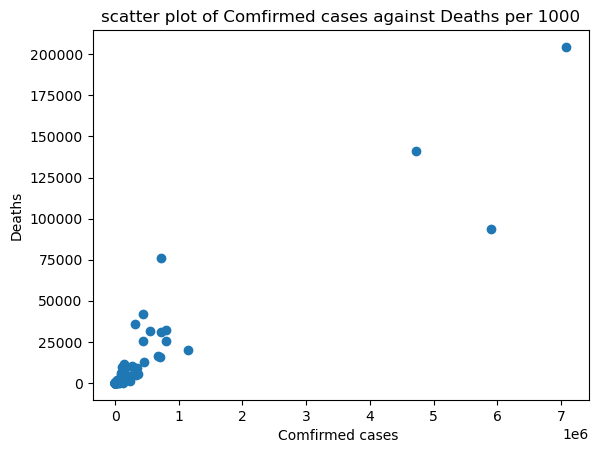

In [26]:
plt.plot(m,n,'o');
plt.xlabel("Comfirmed cases ")
plt.ylabel('Deaths')
plt.title("scatter plot of Comfirmed cases against Deaths per 1000")

# Explanation
    According to the above scatter plot, there is postive relationship between comfirmed cases and deaths, that means that when the comfirmed cases are low, the deaths per 1000 will also be low.. The more the comfirmed cases, there will be an increase in the deaths ..

In [27]:
# 1 part(a) computing the descriptive statistics
# here we'll find the sum, mean, standard deviation....

dataset.describe()
# This function describes for you the data set for each of the variables,
# by computing the sum, mean, standard deviation, minimum, maximum, interquartile among others for each of the variables.

,PopDensity_2018,Confirmed Cases,Deaths,Mortality Rate,Population_2019,GDP_2019,GDP_per_cap_2019,Avg Temp,Normalized Cases,Normalized Deaths
count,178.000000,1.820000e+02,182.000000,182.000000,1.820000e+02,1.690000e+02,168.000000,179.000000,182.000000,182.000000
mean,209.578681,1.798681e+05,5453.186813,2.552053,4.176762e+07,5.037484e+11,22175.663497,18.511117,0.005142,0.000126
std,642.276577,7.728216e+05,21079.533796,2.807438,1.494774e+08,2.060972e+12,22028.464791,8.179984,0.007289,0.000208
min,2.040609,1.900000e+01,0.000000,0.000000,3.386000e+04,4.290166e+08,782.816589,-5.100000,0.000003,0.000000
25%,37.143092,2.930250e+03,50.000000,1.063698,2.689939e+06,1.282700e+10,5398.131919,10.625000,0.000540,0.000008
50%,83.949492,1.337950e+04,228.000000,2.004451,9.758033e+06,4.731962e+10,14747.947505,21.850000,0.002313,0.000038
75%,204.487818,7.642675e+04,1450.000000,3.071983,3.040490e+07,2.619210e+11,32413.601215,25.325000,0.006527,0.000135
max,7952.998418,7.078039e+06,204486.000000,28.916256,1.397715e+09,2.137440e+13,121292.739300,28.290000,0.044084,0.001240


In [28]:
# if i go ahead to pick out a specific variable say popDensity_2018, and compute its descriptive statistics,
# i w ill get the same results as those computed for it above; 

x=dataset.loc[:,'PopDensity_2018']
x

0       56.937760
1       24.713052
2      104.612263
3      163.842553
4      135.609110
          ...    
177    308.125246
178     53.977853
179     47.630120
180     23.341479
181     37.324591
Name: PopDensity_2018, Length: 182, dtype: float64

In [29]:
x.mean()

209.5786809033259

In [30]:
x.std()

642.2765770750084

In [31]:
x.max()

7952.998418

In [33]:
dataset.columns

Index(['Country Code', 'TableName', 'IncomeGroup', 'PopDensity_2018',
       'Confirmed Cases', 'Deaths', 'Mortality Rate', 'Population_2019',
       'GDP_2019', 'GDP_per_cap_2019', 'Main Leader Gender',
       'Any Leader Gender', 'Avg Temp', 'Normalized Cases',
       'Normalized Deaths'],
      dtype='object')

#  1 (b) 
Explain and visualise the regression analysis results for variables: 
Confirmed cases as the dependent variable and socioeconomic variables in the dataset as the independent variables.

dependent variable is Comfirmed cases
independent variables will be Income group, GDP_2019, GDP_per_cap_2019,popDensity_2018 etc


In [35]:
# dependent variable (y);
y=dataset.loc[:,'Confirmed Cases']
y

0       39192
1        4672
2       13153
3        1836
4       90618
        ...  
177      1069
178      2030
179    669498
180     14612
181      7803
Name: Confirmed Cases, Length: 182, dtype: int64

In [36]:
# independent variables below;
p=dataset.loc[:,'IncomeGroup']
p


0               Low income
1      Lower middle income
2      Upper middle income
3              High income
4              High income
              ...         
177    Lower middle income
178             Low income
179    Upper middle income
180    Lower middle income
181    Lower middle income
Name: IncomeGroup, Length: 182, dtype: object

In [37]:
q=dataset.loc[:,'GDP_2019']
q

0      1.910135e+10
1      9.463542e+10
2      1.527808e+10
3      3.154058e+09
4      4.211420e+11
           ...     
177    2.619210e+11
178             NaN
179    3.514320e+11
180    2.306472e+10
181    2.144076e+10
Name: GDP_2019, Length: 182, dtype: float64

In [38]:
r=dataset.loc[:,'GDP_per_cap_2019']
r

0       2293.551684
1       6929.678158
2      14495.078510
3               NaN
4      69900.877850
           ...     
177     8374.444328
178             NaN
179    12999.120260
180     3623.699395
181     2953.484113
Name: GDP_per_cap_2019, Length: 182, dtype: float64

In [39]:
s=dataset.loc[:,'Main Leader Gender']
s

0      M
1      M
2      M
3      M
4      M
      ..
177    M
178    M
179    M
180    M
181    M
Name: Main Leader Gender, Length: 182, dtype: object

In [40]:
x=dataset.loc[:,'PopDensity_2018']
x

0       56.937760
1       24.713052
2      104.612263
3      163.842553
4      135.609110
          ...    
177    308.125246
178     53.977853
179     47.630120
180     23.341479
181     37.324591
Name: PopDensity_2018, Length: 182, dtype: float64

Text(0.5, 1.0, 'scatter plot of Income group against Comfirmed cases')

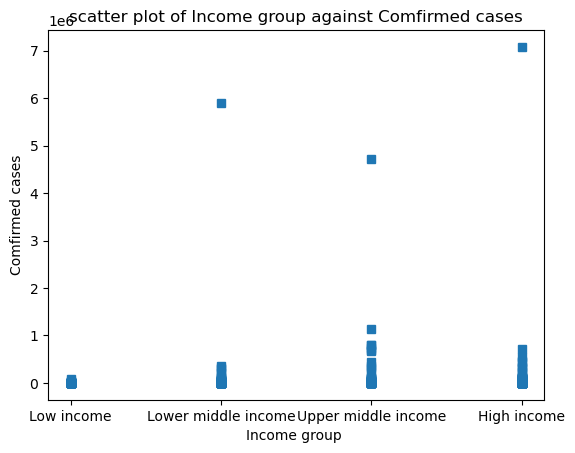

In [42]:
# Pairwise plots of independent variables and dependent variable,below;

plt.plot(p,y,'s');
plt.xlabel("Income group ")
plt.ylabel('Comfirmed cases')
plt.title("scatter plot of Income group against Comfirmed cases")



Text(0.5, 1.0, 'scatter plot of GDP_2019 against Comfirmed cases')

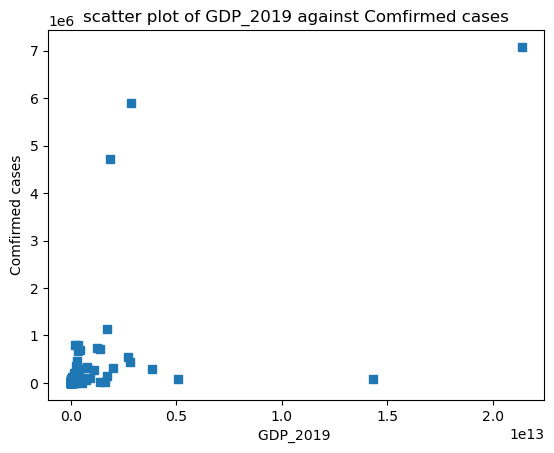

In [46]:
plt.plot(q,y,'s');
plt.xlabel("GDP_2019 ")
plt.ylabel('Comfirmed cases')
plt.title("scatter plot of GDP_2019 against Comfirmed cases")

Text(0.5, 1.0, 'scatter plot of GDP_per_cap_2019 against Comfirmed cases')

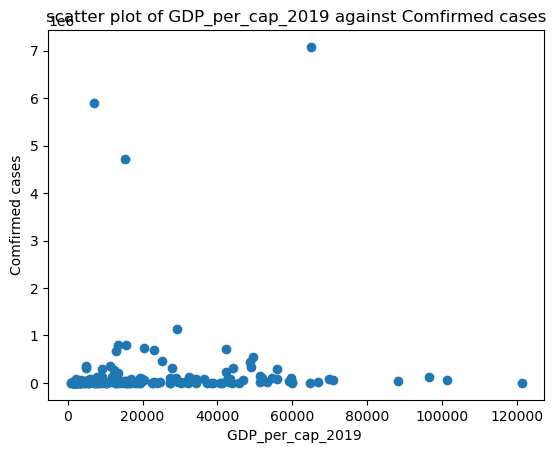

In [45]:
plt.plot(r,y,'o');
plt.xlabel("GDP_per_cap_2019 ")
plt.ylabel('Comfirmed cases')
plt.title("scatter plot of GDP_per_cap_2019 against Comfirmed cases")

Text(0.5, 1.0, 'scatter plot of PopDensity_2018 against Comfirmed cases')

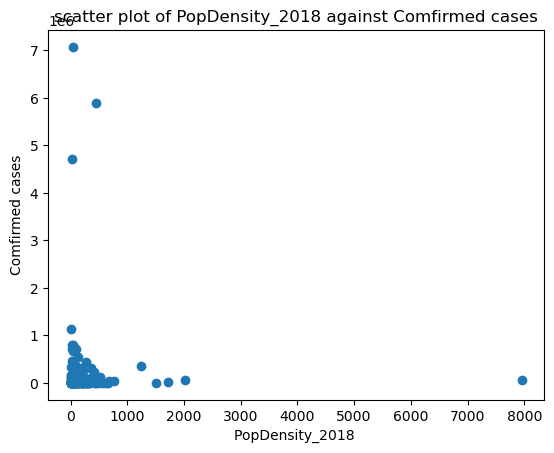

In [44]:
plt.plot(x,y,'o');
plt.xlabel("PopDensity_2018 ")
plt.ylabel('Comfirmed cases')
plt.title("scatter plot of PopDensity_2018 against Comfirmed cases")

In [56]:
m=['GDP_per_cap_2019','PopDensity_2018', 'GDP_2019']
subset=dataset[m]
subset.corr()

,GDP_per_cap_2019,PopDensity_2018,GDP_2019
GDP_per_cap_2019,1.000000,0.294486,0.214056
PopDensity_2018,0.294486,1.000000,-0.009921
GDP_2019,0.214056,-0.009921,1.000000


<AxesSubplot:>

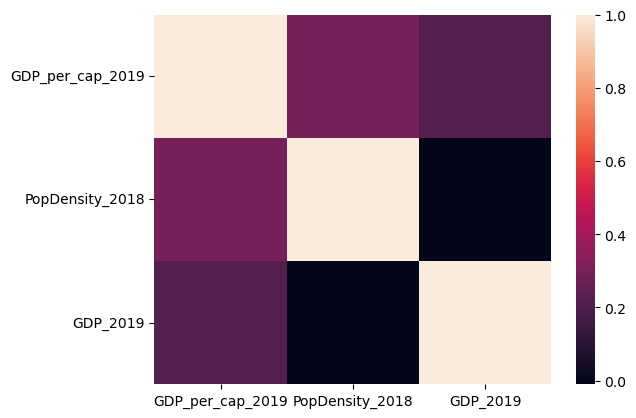

In [58]:
sns.heatmap(subset.corr())

# QUESTION TWO
 Using the taxi dataset. Investigate whether the variable of total amount follows a normal distribution.
Plot the CDF of the total amount variable in the dataset.
(a) Compute the mean and standard deviation of continous variables in the dataset.
(b) Create a normal distribution with the same mean and standard deviation as the data, then use
it to compute the normal CDF for each value in the array.
(c) Plot the normal CDF with a gray line


In [47]:
# Extracting the data
df=pd.read_csv('taxi.csv')
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,2,7/15/2019 16:27,7/15/2019 16:44,3,2.02,1,N,186,233,1,12.0,1.0,0.5,4.08,0.0,0.3,20.38,2.5
1,2,7/17/2019 20:26,7/17/2019 20:40,6,1.59,1,N,141,161,2,10.0,0.5,0.5,0.00,0.0,0.3,13.80,2.5
2,2,7/6/2019 16:01,7/6/2019 16:10,1,1.69,1,N,246,249,2,8.5,0.0,0.5,0.00,0.0,0.3,11.80,2.5
3,1,7/18/2019 22:32,7/18/2019 22:35,1,0.90,1,N,229,141,1,4.5,3.0,0.5,1.65,0.0,0.3,9.95,2.5
4,2,7/19/2019 14:54,7/19/2019 15:19,1,4.79,1,N,237,107,1,19.5,0.0,0.5,5.70,0.0,0.3,28.50,2.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,2,1/18/2019 8:42,1/18/2019 8:56,1,1.18,1,N,43,237,1,10.0,0.0,0.5,2.16,0.0,0.3,12.96,0.0
196,1,1/19/2019 4:34,1/19/2019 4:43,1,2.30,1,N,148,234,1,9.5,0.5,0.5,2.15,0.0,0.3,12.95,0.0
197,2,1/5/2019 10:37,1/5/2019 10:42,1,0.83,1,N,237,263,1,5.0,0.0,0.5,1.16,0.0,0.3,6.96,0.0
198,2,1/23/2019 10:36,1/23/2019 10:44,2,1.12,1,N,144,113,2,7.0,0.0,0.5,0.00,0.0,0.3,7.80,0.0


In [48]:
df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge'],
      dtype='object')

In [49]:
df.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
count,200.000000,200.000000,200.00000,200.000000,200.00000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,2.000000e+02,200.000000,200.000000
mean,1.605000,1.560000,3.72935,1.055000,162.26000,169.080000,1.285000,15.402500,0.790000,0.497500,2.013900,0.465700,3.000000e-01,20.154350,1.125000
std,0.519929,1.222239,4.71901,0.335466,64.62985,67.869618,0.452547,15.172931,1.048282,0.035355,2.292065,1.672997,1.057359e-15,17.072769,1.246855
min,1.000000,0.000000,0.16000,1.000000,4.00000,13.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,3.000000e-01,4.300000,0.000000
25%,1.000000,1.000000,1.12750,1.000000,132.00000,131.250000,1.000000,7.000000,0.000000,0.500000,0.000000,0.000000,3.000000e-01,10.215000,0.000000
50%,2.000000,1.000000,1.88000,1.000000,161.00000,164.000000,1.000000,9.500000,0.500000,0.500000,1.650000,0.000000,3.000000e-01,14.120000,0.000000
75%,2.000000,2.000000,3.82000,1.000000,230.25000,236.000000,2.000000,17.000000,1.000000,0.500000,2.712500,0.000000,3.000000e-01,22.552500,2.500000
max,4.000000,6.000000,22.00000,5.000000,264.00000,265.000000,2.000000,120.000000,4.500000,0.500000,14.640000,10.700000,3.000000e-01,125.300000,2.500000


In [50]:
# checking whether total amount follows a normal distribution
x=df.loc[:,'total_amount']
x


0      20.38
1      13.80
2      11.80
3       9.95
4      28.50
       ...  
195    12.96
196    12.95
197     6.96
198     7.80
199    12.30
Name: total_amount, Length: 200, dtype: float64

Text(0.5, 1.0, 'A histogram showing Total amount')

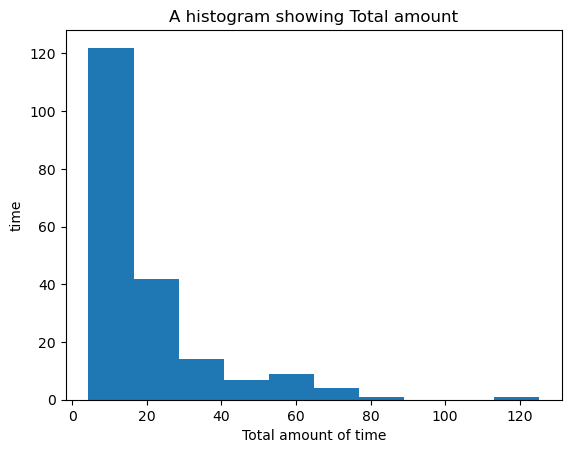

In [51]:
plt.hist(x)
plt.xlabel("Total amount of time")
plt.ylabel('time')
plt.title("A histogram showing Total amount")

# According to the histogram below,
# The total amount data does not exhibit a “bell-shape” 
# thus, it is not normally distributed


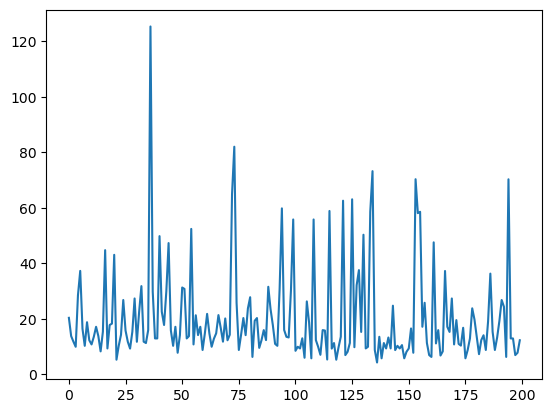

In [59]:
x=df.loc[:,'total_amount']
plt.plot(x);


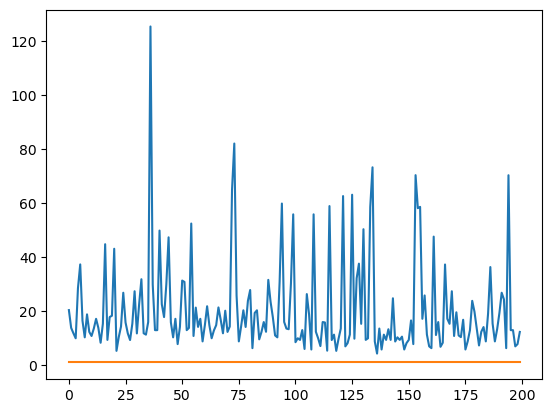

In [60]:
x=df.loc[:,'total_amount']
y=norm(0,1).cdf(x)
plt.plot(x);
plt.plot(y);

In [61]:
# extracting on continous variables

m=df.select_dtypes(include='number')
m


,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,2,3,2.02,1,186,233,1,12.0,1.0,0.5,4.08,0.0,0.3,20.38,2.5
1,2,6,1.59,1,141,161,2,10.0,0.5,0.5,0.00,0.0,0.3,13.80,2.5
2,2,1,1.69,1,246,249,2,8.5,0.0,0.5,0.00,0.0,0.3,11.80,2.5
3,1,1,0.90,1,229,141,1,4.5,3.0,0.5,1.65,0.0,0.3,9.95,2.5
4,2,1,4.79,1,237,107,1,19.5,0.0,0.5,5.70,0.0,0.3,28.50,2.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,2,1,1.18,1,43,237,1,10.0,0.0,0.5,2.16,0.0,0.3,12.96,0.0
196,1,1,2.30,1,148,234,1,9.5,0.5,0.5,2.15,0.0,0.3,12.95,0.0
197,2,1,0.83,1,237,263,1,5.0,0.0,0.5,1.16,0.0,0.3,6.96,0.0
198,2,2,1.12,1,144,113,2,7.0,0.0,0.5,0.00,0.0,0.3,7.80,0.0


In [70]:
# computing the mean of the continous variables, (m) in the dataset
x=m.mean()
x

VendorID                   1.60500
passenger_count            1.56000
trip_distance              3.72935
RatecodeID                 1.05500
PULocationID             162.26000
DOLocationID             169.08000
payment_type               1.28500
fare_amount               15.40250
extra                      0.79000
mta_tax                    0.49750
tip_amount                 2.01390
tolls_amount               0.46570
improvement_surcharge      0.30000
total_amount              20.15435
congestion_surcharge       1.12500
dtype: float64

In [72]:
# getting mean of the continous variables mean
y=x.sum()
y

381.3233000000001

In [73]:
# mean of the continous variables mean (x), will be z
z=y/15
z

25.42155333333334

In [74]:
# computing the standard deviation of the continous variables, (m) in the dataset
l=m.std()
l

VendorID                 5.199295e-01
passenger_count          1.222239e+00
trip_distance            4.719010e+00
RatecodeID               3.354664e-01
PULocationID             6.462985e+01
DOLocationID             6.786962e+01
payment_type             4.525472e-01
fare_amount              1.517293e+01
extra                    1.048282e+00
mta_tax                  3.535534e-02
tip_amount               2.292065e+00
tolls_amount             1.672997e+00
improvement_surcharge    1.057359e-15
total_amount             1.707277e+01
congestion_surcharge     1.246855e+00
dtype: float64

In [75]:
n=l.sum()
n

178.28991471694357

In [76]:
# Standard deviation will be;
p=n/15
p

11.885994314462904

In [81]:
myArray = np.linspace(1,15)
myArray



array([ 1.        ,  1.28571429,  1.57142857,  1.85714286,  2.14285714,
        2.42857143,  2.71428571,  3.        ,  3.28571429,  3.57142857,
        3.85714286,  4.14285714,  4.42857143,  4.71428571,  5.        ,
        5.28571429,  5.57142857,  5.85714286,  6.14285714,  6.42857143,
        6.71428571,  7.        ,  7.28571429,  7.57142857,  7.85714286,
        8.14285714,  8.42857143,  8.71428571,  9.        ,  9.28571429,
        9.57142857,  9.85714286, 10.14285714, 10.42857143, 10.71428571,
       11.        , 11.28571429, 11.57142857, 11.85714286, 12.14285714,
       12.42857143, 12.71428571, 13.        , 13.28571429, 13.57142857,
       13.85714286, 14.14285714, 14.42857143, 14.71428571, 15.        ])

In [82]:
# computing normal cdf for each value of the array
newArray=norm(25,12).cdf(myArray)
newArray

array([0.02275013, 0.0240666 , 0.0254465 , 0.02689204, 0.02840551,
       0.0299892 , 0.03164542, 0.03337651, 0.03518483, 0.03707277,
       0.03904269, 0.04109702, 0.04323813, 0.04546844, 0.04779035,
       0.05020625, 0.05271851, 0.0553295 , 0.05804157, 0.06085702,
       0.06377815, 0.0668072 , 0.06994638, 0.07319785, 0.07656373,
       0.08004605, 0.0836468 , 0.08736791, 0.09121122, 0.09517849,
       0.0992714 , 0.10349153, 0.10784037, 0.11231932, 0.11692964,
       0.1216725 , 0.12654895, 0.13155991, 0.13670617, 0.14198839,
       0.14740708, 0.15296263, 0.15865525, 0.16448504, 0.17045191,
       0.17655562, 0.18279577, 0.1891718 , 0.19568297, 0.20232838])

Text(0.5, 1.0, 'A normal cdf')

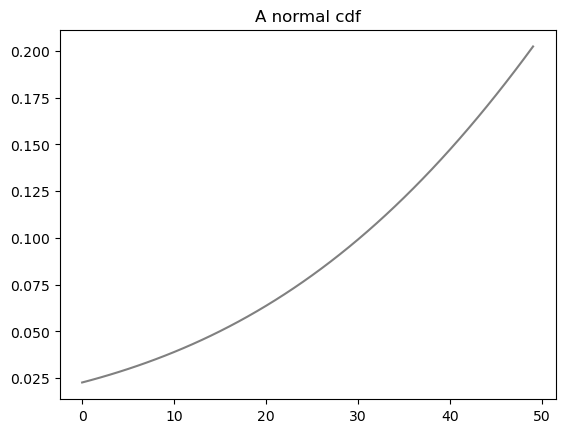

In [83]:
#2(c) plotting the cdf with a gray line

m = np.linspace(1,15)
n = norm(25,12).cdf(m)
plt.plot(n,color='gray');
plt.title('A normal cdf')

#  QUESTION FOUR

If we start with a principal sum, P, and earn compounded interest, the total accumulated value, V ,
at the end of time t is:
V = P

1 +
r
n
nt
(2)
where r is the annual interest rate and n is the compounding frequency. For example, if you deposit
$2,100 in a bank paying an annual interest rate of 3.4% compounded quarterly, compute the balance
after 7 years using the above variables.
(a) Continuing the previous example, suppose you start with the same principle and the same interest
rate, but interest is compounded twice per year, so n = 2. What would the total value be after
7 years?
(b) If interest is compounded continuously, the value after time is given by the formula:
V = P ert (3)
Translate this equation into Python and use it compute the value of the investment in the previous
example with continuous compounding.


In [9]:
# summary of the variables given;
p = 2100
r = 0.034
n = 4
t = 12
# a year made up of 12 months and calculating the total value after 7 years

In [10]:
v = p*(1+(r/n))**(n*t)
v = 2100*(1+ 0.034/4)**(4*7)
v
# The total value after 7 years will be $ 2661.6

2661.6108980682593

In [12]:
# part (a) same principle, same interest rate but interest is compounded twice per year
# n=2,
# Total value, v2 will be;

v2 = p*(1+(r/n))**(n*t)
v2 = 2100 *(1 +(0.034/2))**(2*7)
v2
# The total value is $ 2658.97

2658.965091277534

In [13]:
# part (b) if interest is compunded continously;
# V = P ert 
#  the value of the investment (v3) with continuous compounding will be;

v3= 2100**(0.034*7) 
v3

6.175728457877729

# QUESTION 5

Recall that the linear regression problem can be solved using the Least Squares method by optimizing
the normal equation below:
Θ = ( ˆ XT X)
−1XT
y (4)
Implement the simple linear regression and multiple linear regression using the taxi 2 dataset:

In [84]:
# extracting the data

data=pd.read_csv('taxi.csv')
data

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,2,7/15/2019 16:27,7/15/2019 16:44,3,2.02,1,N,186,233,1,12.0,1.0,0.5,4.08,0.0,0.3,20.38,2.5
1,2,7/17/2019 20:26,7/17/2019 20:40,6,1.59,1,N,141,161,2,10.0,0.5,0.5,0.00,0.0,0.3,13.80,2.5
2,2,7/6/2019 16:01,7/6/2019 16:10,1,1.69,1,N,246,249,2,8.5,0.0,0.5,0.00,0.0,0.3,11.80,2.5
3,1,7/18/2019 22:32,7/18/2019 22:35,1,0.90,1,N,229,141,1,4.5,3.0,0.5,1.65,0.0,0.3,9.95,2.5
4,2,7/19/2019 14:54,7/19/2019 15:19,1,4.79,1,N,237,107,1,19.5,0.0,0.5,5.70,0.0,0.3,28.50,2.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,2,1/18/2019 8:42,1/18/2019 8:56,1,1.18,1,N,43,237,1,10.0,0.0,0.5,2.16,0.0,0.3,12.96,0.0
196,1,1/19/2019 4:34,1/19/2019 4:43,1,2.30,1,N,148,234,1,9.5,0.5,0.5,2.15,0.0,0.3,12.95,0.0
197,2,1/5/2019 10:37,1/5/2019 10:42,1,0.83,1,N,237,263,1,5.0,0.0,0.5,1.16,0.0,0.3,6.96,0.0
198,2,1/23/2019 10:36,1/23/2019 10:44,2,1.12,1,N,144,113,2,7.0,0.0,0.5,0.00,0.0,0.3,7.80,0.0


In [85]:
data.head

<bound method NDFrame.head of      VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0           2      7/15/2019 16:27       7/15/2019 16:44                3   
1           2      7/17/2019 20:26       7/17/2019 20:40                6   
2           2       7/6/2019 16:01        7/6/2019 16:10                1   
3           1      7/18/2019 22:32       7/18/2019 22:35                1   
4           2      7/19/2019 14:54       7/19/2019 15:19                1   
..        ...                  ...                   ...              ...   
195         2       1/18/2019 8:42        1/18/2019 8:56                1   
196         1       1/19/2019 4:34        1/19/2019 4:43                1   
197         2       1/5/2019 10:37        1/5/2019 10:42                1   
198         2      1/23/2019 10:36       1/23/2019 10:44                2   
199         2       1/30/2019 6:55        1/30/2019 7:07                5   

     trip_distance  RatecodeID store_and_fwd_

In [93]:
data.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
count,200.000000,200.000000,200.00000,200.000000,200.00000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,2.000000e+02,200.000000,200.000000
mean,1.605000,1.560000,3.72935,1.055000,162.26000,169.080000,1.285000,15.402500,0.790000,0.497500,2.013900,0.465700,3.000000e-01,20.154350,1.125000
std,0.519929,1.222239,4.71901,0.335466,64.62985,67.869618,0.452547,15.172931,1.048282,0.035355,2.292065,1.672997,1.057359e-15,17.072769,1.246855
min,1.000000,0.000000,0.16000,1.000000,4.00000,13.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,3.000000e-01,4.300000,0.000000
25%,1.000000,1.000000,1.12750,1.000000,132.00000,131.250000,1.000000,7.000000,0.000000,0.500000,0.000000,0.000000,3.000000e-01,10.215000,0.000000
50%,2.000000,1.000000,1.88000,1.000000,161.00000,164.000000,1.000000,9.500000,0.500000,0.500000,1.650000,0.000000,3.000000e-01,14.120000,0.000000
75%,2.000000,2.000000,3.82000,1.000000,230.25000,236.000000,2.000000,17.000000,1.000000,0.500000,2.712500,0.000000,3.000000e-01,22.552500,2.500000
max,4.000000,6.000000,22.00000,5.000000,264.00000,265.000000,2.000000,120.000000,4.500000,0.500000,14.640000,10.700000,3.000000e-01,125.300000,2.500000


In [98]:
# question5 solving using least squares method by optimzing the normal equation
# we'll start with creating a class
rng=np.random.RandomState(35)
#this is a class
rng

RandomState(MT19937) at 0x1B4BF74E940

In [99]:
# then we will create a random state like scenario, like imagining real worlds
x=5*rng.rand(45)
x

#y=mx+c

array([2.29027474, 1.54174803, 1.15743523, 1.38712276, 4.08617406,
       0.55673318, 3.13218614, 1.38393943, 3.41087337, 3.39485392,
       3.98358709, 0.22901081, 4.56299137, 1.06907993, 1.51818651,
       4.94531812, 0.92940751, 4.94362418, 3.75042116, 1.11193023,
       0.73951954, 2.57895138, 1.97129159, 0.34940063, 1.69112885,
       0.05518611, 3.83763929, 4.37361065, 2.6679716 , 0.42206375,
       4.12165598, 2.52290598, 4.40809313, 0.87023142, 2.01478943,
       4.16063272, 4.89331236, 3.09582383, 4.34960328, 1.2443845 ,
       3.21516979, 1.50225329, 1.22680276, 2.73011842, 0.59880421])

In [100]:
y=2*x-1+rng.random(45)
y

array([ 3.92364619,  2.71528303,  2.14642237,  2.12963341,  7.40775988,
        0.91550169,  5.86808515,  2.26150901,  6.7547979 ,  6.44281959,
        7.64602361, -0.2303195 ,  8.24612514,  1.2930781 ,  2.80248498,
        9.40313912,  1.320419  ,  9.63991098,  7.45194865,  1.36080122,
        1.42822474,  4.27338592,  3.93285761,  0.13893311,  2.52440856,
       -0.21683713,  6.94064178,  8.32070028,  4.4495552 ,  0.7037384 ,
        7.24639546,  4.58031963,  8.27175381,  1.19842985,  3.73386792,
        7.36188474,  9.00817069,  5.53848038,  8.65774374,  1.9619193 ,
        6.05109704,  2.3804937 ,  1.82152213,  5.00952208,  0.72476934])

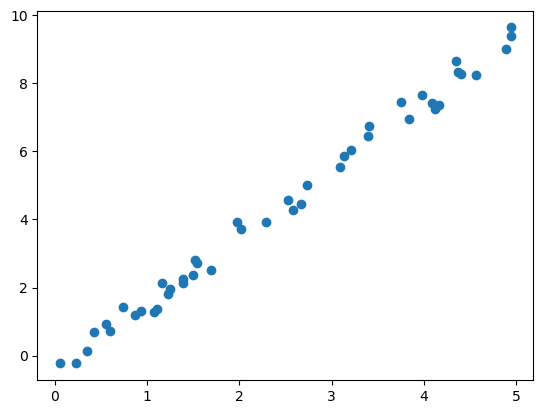

In [101]:
# plotting the x and y generated
plt.scatter(x,y)

# from the scatter plot below,
# x and y are highly correlate, we can draw the line of the best fit

In [102]:
# importing the class model
import sklearn
from sklearn.linear_model import LinearRegression

In [103]:
# choose a model hyper parameters,, optimizing to get the best out of it
myModel=LinearRegression(fit_intercept=True)
myModel
#here myModel stores the hyper parameter values

LinearRegression()

In [104]:
#  Arranging the data into features matrix(x) and target vector(y)
# slicing the matrix
x=x[:,np.newaxis]
x

array([[2.29027474],
       [1.54174803],
       [1.15743523],
       [1.38712276],
       [4.08617406],
       [0.55673318],
       [3.13218614],
       [1.38393943],
       [3.41087337],
       [3.39485392],
       [3.98358709],
       [0.22901081],
       [4.56299137],
       [1.06907993],
       [1.51818651],
       [4.94531812],
       [0.92940751],
       [4.94362418],
       [3.75042116],
       [1.11193023],
       [0.73951954],
       [2.57895138],
       [1.97129159],
       [0.34940063],
       [1.69112885],
       [0.05518611],
       [3.83763929],
       [4.37361065],
       [2.6679716 ],
       [0.42206375],
       [4.12165598],
       [2.52290598],
       [4.40809313],
       [0.87023142],
       [2.01478943],
       [4.16063272],
       [4.89331236],
       [3.09582383],
       [4.34960328],
       [1.2443845 ],
       [3.21516979],
       [1.50225329],
       [1.22680276],
       [2.73011842],
       [0.59880421]])

In [105]:
# we can get the shape of x
x.shape

(45, 1)

In [106]:
# i can fit my model to the data
myModel.fit(x,y)

LinearRegression()

In [107]:
# we can retrieve the data
# getting the coefficient and intercept
myModel.coef_

array([1.97841471])

In [108]:
myModel.intercept_

-0.4479572033172019

The above stages would mean, i have made myModel learn the data.

In [115]:
# we can go ahead with Predicting labels of unknown data
xfit=np.linspace(-1,10)
xfit

array([-1.        , -0.7755102 , -0.55102041, -0.32653061, -0.10204082,
        0.12244898,  0.34693878,  0.57142857,  0.79591837,  1.02040816,
        1.24489796,  1.46938776,  1.69387755,  1.91836735,  2.14285714,
        2.36734694,  2.59183673,  2.81632653,  3.04081633,  3.26530612,
        3.48979592,  3.71428571,  3.93877551,  4.16326531,  4.3877551 ,
        4.6122449 ,  4.83673469,  5.06122449,  5.28571429,  5.51020408,
        5.73469388,  5.95918367,  6.18367347,  6.40816327,  6.63265306,
        6.85714286,  7.08163265,  7.30612245,  7.53061224,  7.75510204,
        7.97959184,  8.20408163,  8.42857143,  8.65306122,  8.87755102,
        9.10204082,  9.32653061,  9.55102041,  9.7755102 , 10.        ])

In [121]:
data.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge'],
      dtype='object')

xfit=xfit[:,np.newaxis]


In [120]:
yfit=model.predict(xfit)
yfit

NameError: name 'model' is not defined

In [118]:
plt.scatter(xfit,yfit)

NameError: name 'yfit' is not defined